# <center> Bike Sharing Demand 
The dataset is an ensemble of statements about sharing bike. The main goal is to predict the number of rented bikes hour by hour in the city.<center>

Notebook structure :
- Import Libraries
- Quick look to the data
- Part I - Exploratory Data Analysis
    - What kind of problem is it ?
    - Which factors seems to have influence on the target ?
    - What kind of features could be engineered / created ?
- Part II - Machine Learning
    - Which metrics seems fit the best for the task of predicting the target ?
    - Validation scheme
    - Modeling
    - Feature importance

# Import Libraries

## Setup

In [1]:
print('-'*30)
import sys 
print("Python version: {}". format(sys.version))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import warnings
warnings.filterwarnings('ignore')
print('-'*30)

------------------------------
Python version: 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]
NumPy version: 1.19.1
pandas version: 1.1.1
matplotlib version: 3.3.1
scikit-learn version: 0.23.2
------------------------------


##  Modelling Libraries

In [2]:
#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#CHelpers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Models
from sklearn import linear_model, ensemble, tree
import xgboost


# Quick look to the data

We have 10886 rows and 11 attributes (I used the datetime column as an index). 
- The attribute "count" is target varibale.
- Numerical attributes : "temp", "atemp", "humidity", "windspeed", "windspeed", "casual" and "registered".
- Categorical attributes : "season", "holiday", "workingday", "weather" are categorical attributes.
- There is no missing value.
- "datetime" contains information on the first 19 days of each month. 

## Quick look

In [3]:
#load the data :
data = pd.read_csv('data.csv', index_col=0, parse_dates=True)

In [4]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Quicl look :
print('(row,columns) =', data.shape)
data.head()

(row,columns) = (10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
data.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
#Check the data type of each column :
data.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
# Check for missing value :
data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
# Check the datetime index informations
print("month: ", set(data.index.month))
print("days: ", set(data.index.day))

month:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
days:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


## Target distribution 

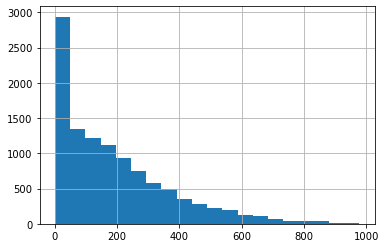

In [10]:
data["count"].hist(bins=20)
plt.show()

The target present a heavy-tailed distribution --> To get bell-shaped distributions, we will perform a log transformation.

## Categorical attributes count

In [11]:
# Basics features engineering :  
data["season"] = data["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}) 
data["weather"] = data["weather"].map({1:"Clear or Few clouds", 
                                       2:"Mist or Cloudy", 
                                       3:"Light Rain or Snow", 
                                       4:"Heavy Rain or Snow"}) 

In [12]:
def plot_annotate(axis):
    for patches in axis.patches:
        txt = str(int(patches.get_height().round()))
        x = patches.get_x() + patches.get_width()/2
        y = patches.get_height()
        axis.text(x,y,txt, ha='center')

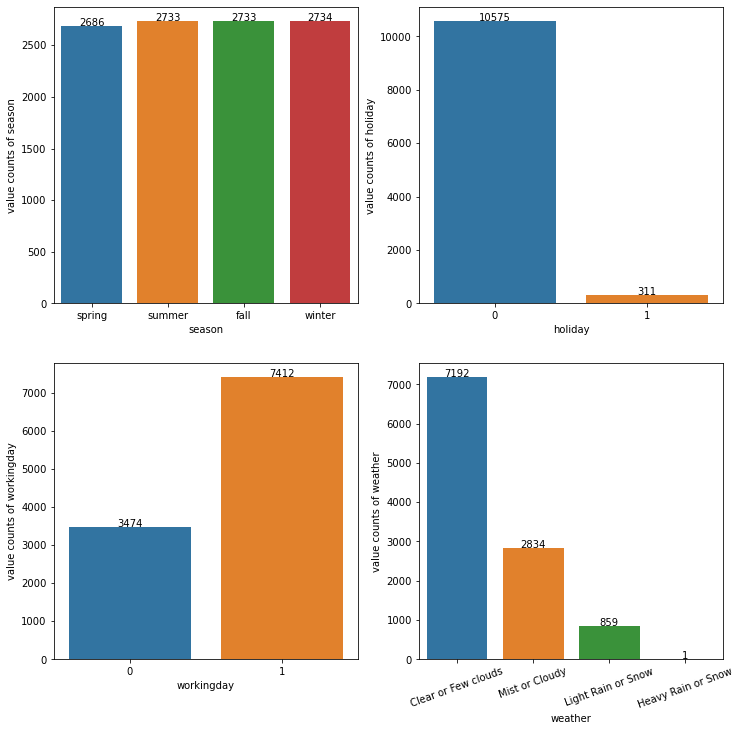

In [13]:
fig, axis = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(x="season", data=data, ax=axis[0,0])
axis[0,0].set(xlabel='season', ylabel="value counts of season")
plot_annotate(axis[0,0])



sns.countplot(x="holiday", data=data, ax=axis[0,1])
axis[0,1].set(xlabel='holiday', ylabel="value counts of holiday")
plot_annotate(axis[0,1])

sns.countplot(x="workingday", data=data, ax=axis[1,0])
axis[1,0].set(xlabel='workingday', ylabel="value counts of workingday")
plot_annotate(axis[1,0])

sns.countplot(x="weather", data=data, ax=axis[1,1])
axis[1,1].set(xlabel='weather', ylabel="value counts of weather")
axis[1,1].tick_params(axis='x',labelrotation=20)
plot_annotate(axis[1,1])

plt.show()

- The "season" attribute is well balanced.
- The "holiday" attribute is skewed : there are only few holiday days (<3%)
- The "workingday" attribute is skewed. Working day represent 68% of all days.
- "weather"  attribute : there is only one observation for a Heavy Rain/Snow category. This observation can be included in the Light Rain/Snow  category which can be considered rare compared to the other two categories.

In [14]:
#I replace Light/Heavy Rain or Snow" simply by "Rain or Snow":
data["weather"] = data["weather"].map({"Clear or Few clouds":"Clear or Few clouds", 
                                       "Mist or Cloudy":"Mist or Cloudy", 
                                       "Light Rain or Snow":"Rain or Snow", 
                                       "Heavy Rain or Snow":"Rain or Snow"}) 

In [15]:
data["weather"].value_counts()

Clear or Few clouds    7192
Mist or Cloudy         2834
Rain or Snow            860
Name: weather, dtype: int64

# Part I - Exploratory Data Analysis

## What kind of problem is it ?

Since, we got labeled training data, our problem is a supervised learning task. More specifically, it's a multiple (multiple features) and univariate (prediect single value) regression task.  

## Which factors seems to have influence on the target ? 

We'll show below that the attribute "temp" (or "atemp") and "humidity" seems to have a strong influence on the target "count". We'll also show that the "weather" factor might lose influence the target. Finally, the attribute "windspeed" may also play a (weak) role to predict the target.  
Interpretation : 
- The influance "temp" (or "atemp") can be esaly undrstood : Biking is more comfortable when the temperature is pleasant. But its not necessery true for hot temperatures!  
- Same thing for the "humidity" factor : humid days are unpleasant and uncomfortable because it is extremely hot and damp ! Not really a good idea for biking ! 
- The "weather" attribut : everybody agrees that cycling is more pleasant in nice days!
- windspeed : 

Finaly, we note taht the attributes “casual” and “registered” already contain the information we are trying to predict: “count”! In fact, these attributes would not be available in practice! So, we need to drop them during modeling.

### Influence of numerical attributes - Looking for linear correlations

In [16]:
correlations = data[["temp", "atemp", "windspeed", "humidity", "casual", "registered", "count"]].corr()
correlations

,temp,atemp,windspeed,humidity,casual,registered,count
temp,1.000000,0.984948,-0.017852,-0.064949,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.057473,-0.043536,0.462067,0.314635,0.389784
windspeed,-0.017852,-0.057473,1.000000,-0.318607,0.092276,0.091052,0.101369
humidity,-0.064949,-0.043536,-0.318607,1.000000,-0.348187,-0.265458,-0.317371
casual,0.467097,0.462067,0.092276,-0.348187,1.000000,0.497250,0.690414
registered,0.318571,0.314635,0.091052,-0.265458,0.497250,1.000000,0.970948
count,0.394454,0.389784,0.101369,-0.317371,0.690414,0.970948,1.000000


In [17]:
correlations['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
windspeed     0.101369
humidity     -0.317371
Name: count, dtype: float64

- The attributes "registered" and "casual" show a strong correlation with "count". But those attributes already contain the information we are trying to predict ! We need to drop them during modeling.    
- We have strong positve correlation between the two attributes "temp" and "atemp" and the target "count". But "atemp" and "temp" are strongly correlated with each other!  So, during modeling, we’ll take into account only one of them.
- We have a strong negative correlation between the attribute “humidity” and the target "count". One can notice that "humidity" is not correlated (very weakly)  to "temp"/"atemp". 
- The attribute "windspeed" is “weakly” correlated to the target. 

We can alos use plots to see correlations : 

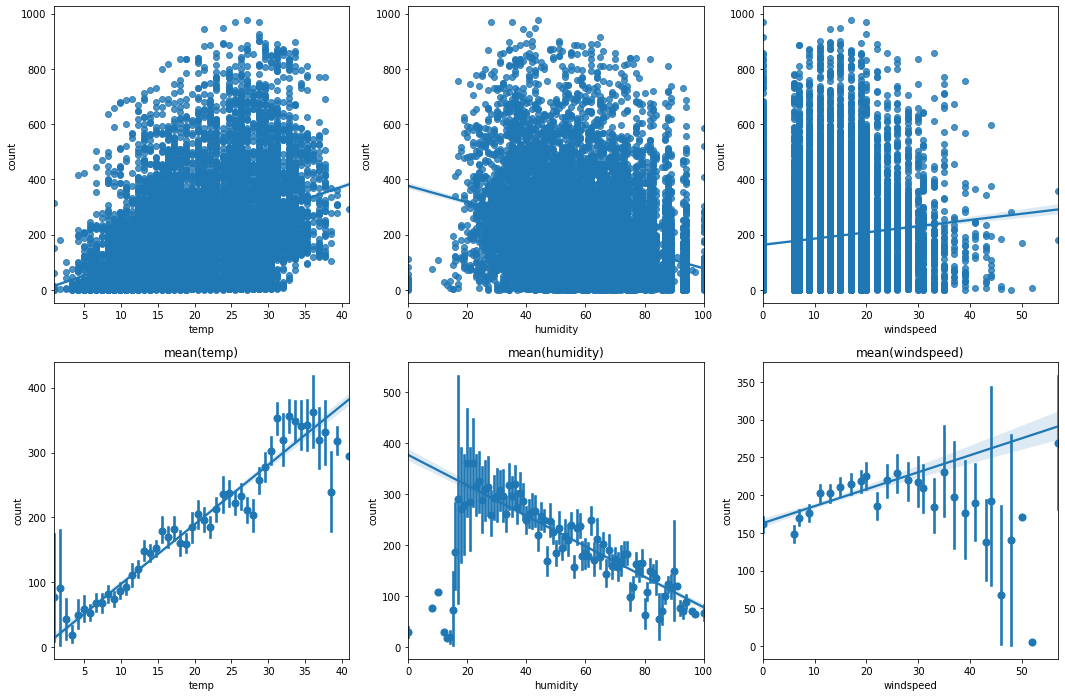

In [18]:
fig, axis = plt.subplots(2, 3, figsize=(18,12))
sns.regplot(x="temp", y="count", data=data, ax=axis[0,0])
sns.regplot(x="temp", y="count", data=data, ax=axis[1,0], x_estimator=np.mean).set_title('mean(temp)')
sns.regplot(x="humidity", y="count", data=data, ax=axis[0,1])
sns.regplot(x="humidity", y="count", data=data, ax=axis[1,1], x_estimator=np.mean).set_title('mean(humidity)')
sns.regplot(x="windspeed", y="count", data=data, ax=axis[0,2])
sns.regplot(x="windspeed", y="count", data=data, ax=axis[1,2], x_estimator=np.mean).set_title('mean(windspeed)')
plt.show()

### Influence of categorical attributes

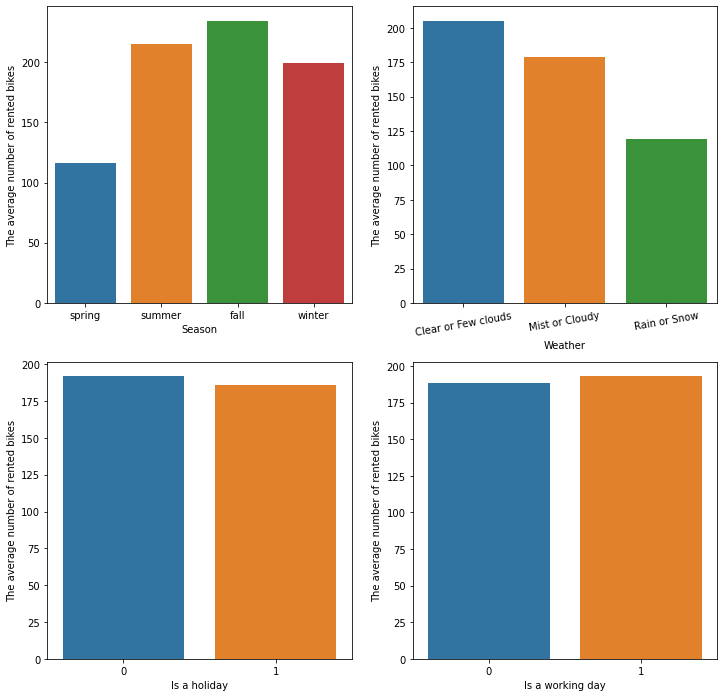

In [19]:
fig, axis = plt.subplots(2, 2, figsize=(12,12))
count_by_season = data.groupby("season")["count"].mean().rename("count").reset_index()
count_by_holiday = data.groupby("holiday")["count"].mean().rename("count").reset_index()
count_by_workingday = data.groupby("workingday")["count"].mean().rename("count").reset_index()
count_by_weather = data.groupby("weather")["count"].mean().rename("count").reset_index()

season_order = ["spring", "summer", "fall", "winter"]
sns.barplot(x= "season", y="count", data=count_by_season, ax=axis[0,0], order=season_order)
axis[0,0].set(xlabel="Season", ylabel="The average number of rented bikes")

weather_order = ["Clear or Few clouds", "Mist or Cloudy", "Rain or Snow"]
sns.barplot(x= "weather", y="count", data=count_by_weather, ax=axis[0,1], order=weather_order)
axis[0,1].set(xlabel='Weather', ylabel="The average number of rented bikes")
axis[0,1].tick_params(axis='x',labelrotation=10)

sns.barplot(x= "holiday", y="count", data=count_by_holiday, ax=axis[1,0] )
axis[1,0].set(xlabel='Is a holiday', ylabel="The average number of rented bikes")

sns.barplot(x= "workingday", y="count", data=count_by_workingday, ax=axis[1,1])
axis[1,1].set(xlabel="Is a working day", ylabel="The average number of rented bikes")

plt.show()

- The top-left figure shows that the average number of rented bikes decrease approximately by half in the string season compared to summer, fall or winter.  It seems to me strange that there are more users in winter than in spring! We will try to understand this below ... 
- The top-right figure show that the user behavior is connected to the weather. Cycling is more pleasant in nice days! Note taht "weather" is probably also related to the "humidity" attributes. 
- Bottom figures  show that holidays and day work/off don't affect the average number of rented bikes. 

In [20]:
# looking for correlations between "weather", "humidity" and "count" 
weather_data = data["weather"].map({"Clear or Few clouds":1,
                                         "Mist or Cloudy": 2, 
                                         "Rain or Snow": 3})
pd.concat([weather_data, data["humidity"], data["count"]], axis=1).corr()

,weather,humidity,count
weather,1.000000,0.406255,-0.128694
humidity,0.406255,1.000000,-0.317371
count,-0.128694,-0.317371,1.000000


 - As expected "weather" and "humidity" are strongly correlated. So, to avoid collinearity, we might include only one of these two features during modeling.  

In [21]:
# Why are there more users in winter than in spring ? 
print("spring :",set(data[data["season"]=="spring"].index.month_name()))
print("summer :",set(data[data["season"]=="summer"].index.month_name()))
print("fall : ",set(data[data["season"]=="fall"].index.month_name()))
print("winter :",set(data[data["season"]=="winter"].index.month_name()))

spring : {'January', 'March', 'February'}
summer : {'May', 'April', 'June'}
fall :  {'September', 'August', 'July'}
winter : {'November', 'December', 'October'}


- In normally snowless areas, "spring" may begin as early as February (Northern Hemisphere) or August (Southern Hemisphere). Source : Wikipedia
- The data seems to be collected from a Northern Hemisphere area. Maybe from Ireland, where spring is often defined as February, March and April (Wikipedia).

In [22]:
# spring temperature/humidity statistics:
data[data["season"]=="spring"][["temp", "humidity"]].describe()

,temp,humidity
count,2686.000000,2686.000000
mean,12.530491,56.297841
std,5.186492,20.158420
min,0.820000,0.000000
25%,9.020000,41.000000
50%,12.300000,53.000000
75%,16.400000,70.000000
max,29.520000,100.000000


In [23]:
#winter temperature/humidity statistics:
data[data["season"]=="winter"][["temp", "humidity"]].describe()

,temp,humidity
count,2734.000000,2734.000000
mean,16.649239,66.173738
std,4.742176,17.813446
min,5.740000,16.000000
25%,13.120000,52.000000
50%,16.400000,66.000000
75%,20.500000,81.000000
max,30.340000,100.000000


- In our data, winter is more humid but spring seems to be colder than winter! For exemple, the median temperature in sping is 12C and 16.4 in winter! This “cold spring” may explain the user behavior shown before.   

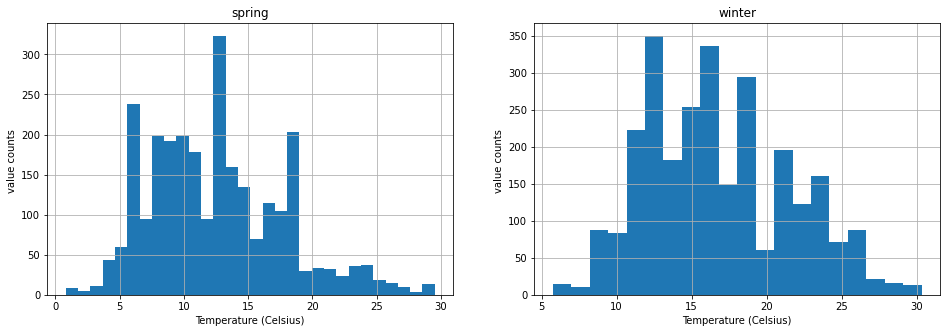

In [24]:
fig, axis = plt.subplots(1, 2, figsize=(16,5))

data[data["season"]=="spring"].temp.hist(bins=30,  ax=axis[0])
axis[0].set(xlabel="Temperature (Celsius)", ylabel="value counts ", title="spring")

data[data["season"]=="winter"].temp.hist(bins=20, ax=axis[1])
axis[1].set(xlabel="Temperature (Celsius)", ylabel="value counts ", title="winter")

plt.show()

## What kind of features could be engineered / created ? 

Date/Time features : 
- Our supervised learning problem is to predict the number of rented bikes for given hour. So, the first important feature we need to create is the integer "hour". 
- The number of rented bikes is probably connected to the day of the week : the user behaviors could vary between the workweek and  the weekend. We can first create the variable "weekday", and then, if our analysis suggests it, we can add/replace it by a binary variable "is_workweek". 
- Finally, for this specific problem the information about the year/month seems to be more relevant than the information about the day/week number(our data only contains information on the first 19 days of each month). So,  we need to create the variable "month". But, as we will see we need to day information for the validation scheme  

The "hour", "day", "weekday", "month" and "year features can be extracted from the time-stamp information for each observation. The feature "is_weekend" if needed can easily create from "weekday". 

In [25]:
data["hour"] = data.index.hour 
data["dayofweek"] = data.index.day_name() 
data["month"] = data.index.month_name()

data["day"] = data.index.day 
data["year"] = data.index.year 

In [26]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,day,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,spring,0,0,Clear or Few clouds,9.84,14.395,81,0.0,3,13,16,0,Saturday,January,1,2011
2011-01-01 01:00:00,spring,0,0,Clear or Few clouds,9.02,13.635,80,0.0,8,32,40,1,Saturday,January,1,2011
2011-01-01 02:00:00,spring,0,0,Clear or Few clouds,9.02,13.635,80,0.0,5,27,32,2,Saturday,January,1,2011
2011-01-01 03:00:00,spring,0,0,Clear or Few clouds,9.84,14.395,75,0.0,3,10,13,3,Saturday,January,1,2011
2011-01-01 04:00:00,spring,0,0,Clear or Few clouds,9.84,14.395,75,0.0,0,1,1,4,Saturday,January,1,2011


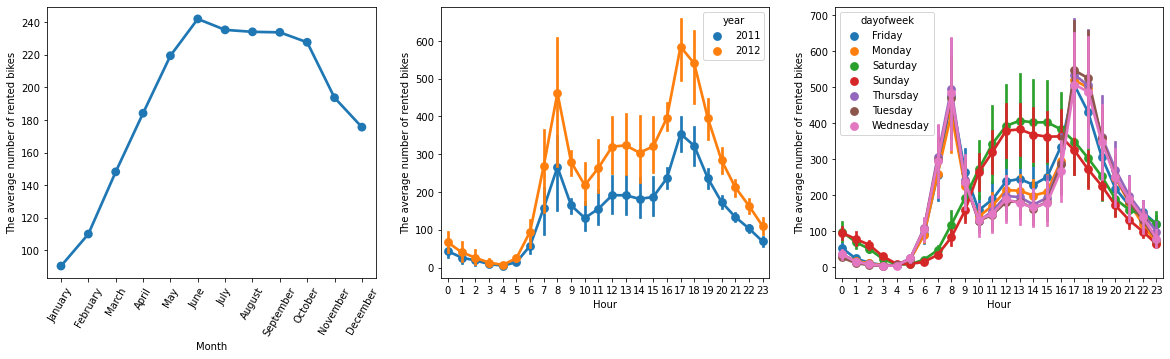

In [27]:
count_by_month = data.groupby("month")["count"].mean().rename("count").reset_index()
count_by_hour = data.groupby(["hour", "dayofweek", "year"])["count"].mean().rename("count").reset_index()
count_by_day = data.groupby(["day", "month", "year"])["count"].mean().rename("count").reset_index()

fig, axis = plt.subplots(1, 3, figsize=(20,5))

list_months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.pointplot(x= "month", y='count', data= count_by_month, order=list_months, ax=axis[0])
axis[0].set(xlabel="Month", ylabel="The average number of rented bikes")
axis[0].tick_params(axis='x',labelrotation=60)

sns.pointplot(x= "hour", y='count', hue = "year", data= count_by_hour, ax=axis[1])
axis[1].set(xlabel="Hour", ylabel="The average number of rented bikes")

sns.pointplot(x= "hour", y='count', hue ="dayofweek" , data= count_by_hour, ax=axis[2])
axis[2].set(xlabel="Hour", ylabel="The average number of rented bikes")

plt.show()

- The user behavior is completely modified on the weekend.
- 3h-4h : count ~ 0
- count(evening rush hour) > count(morning rush hour)
- Ther are more users in 2012
- hight count perdiod : may-october 

In [28]:
# Add "is_workweek"
data["is_workweek"] = data["dayofweek"].map(lambda x: 1 if x not in ["Saturday", "Sunday"] else 0)

If there missing values season, temp, windspeed

# Part II - Machine Learning

## Which metrics seems fit the best for the task of predicting the target ? 

We need to evaluate how well our model can predict the number of rented bikes for given hour (witch is a continuous value). So, we can simply use root mean squared  error (RMSE) which is useful for understanding.

$$RMSE  = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

$y_i$ and $\hat{y}_i$ are, respectively the predicted and and theactual values. $n$ is the number of instances. 

For this particular case, I think if our model underestimate the number of rented bikes/hour, it'll be problematic : this might affect the quality of the bike rental service. To do this, we can modify the RMSE by taking the log of the predictions and actual values. In fact, the log transfomration will penalizes the underestimation. This metric in known as the  root mean squared logarithmic error (RMSLE). 

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}$$


On can note that RMSLE is less sensitive to outliers than RMSE.   




## Validation scheme

For each month we have only the first 19 days. Since we have sequential data, for each month we will train our models on $N_{\rm d}$ successive days $1,2, …, N_{\rm d}$ and then predict the “future” (days $N_{\rm d} +1, …, 19$. More precisely:  
- We are going to split the data in 5 successive folds k=0,1,2,3,4:
    - k = 0, is used only for training 
    - k = 1, 2, 3 for validation
    - k = 4 is the test set. 
- step-1: we train the model on fold k=0—> predict (the future) on for k= 1 
- step-2: we train the model on fold k=0, 1—> predict (the future) on for k= 2 
- step-3: we train the model on fold k=0,1,2—> predict (the future) on for k= 3 

The validation fold k=1, 2, 3 will to tweak the hyperparameters . After that, we use the best model to get prediction on the test set k=4 and estimate the generalization error.   


### Prepare the data for ML algorithms

In [29]:
# Some transformations (not really necessary!!) 
data["hour"] = data["hour"].map(lambda x: str(x)+"h")
data["holiday"] = data["holiday"].map({1:"holy=1", 0: "holy=0"})
data["is_workweek"] = data["is_workweek"].map({1:"wd=1", 0: "wd=0"})

In [30]:
# get_fold
def get_fold(day):
    if day <=4 : return 0
    if day <=8 : return 1
    if day <=12 :return 2
    if day <=16 :return 3
    if day <=19 :return 4

In [31]:
selected_attributes = ["year", "month", "day", "dayofweek", "hour", "holiday", "is_workweek",
                       "season", "weather", "temp", "humidity","windspeed", 
                       "count"]
data_folds = data[selected_attributes].reset_index(drop=True)
data_folds["kfold"] = data_folds["day"].map(lambda x:get_fold(x))
data_folds = data_folds.drop("day", axis=1)
data_folds.head()

,year,month,dayofweek,hour,holiday,is_workweek,season,weather,temp,humidity,windspeed,count,kfold
0,2011,January,Saturday,0h,holy=0,wd=0,spring,Clear or Few clouds,9.84,81,0.0,16,0
1,2011,January,Saturday,1h,holy=0,wd=0,spring,Clear or Few clouds,9.02,80,0.0,40,0
2,2011,January,Saturday,2h,holy=0,wd=0,spring,Clear or Few clouds,9.02,80,0.0,32,0
3,2011,January,Saturday,3h,holy=0,wd=0,spring,Clear or Few clouds,9.84,75,0.0,13,0
4,2011,January,Saturday,4h,holy=0,wd=0,spring,Clear or Few clouds,9.84,75,0.0,1,0


In [32]:
num_features = ["temp", "humidity","windspeed"]
cat_features = ["year", "month", "dayofweek", "hour", "holiday", "is_workweek", "season", "weather"]
all_features = ["temp", "humidity","windspeed",
                "year", "month", "dayofweek", "hour", "holiday", "is_workweek", "season", "weather"]

In [33]:
# Pipeline
num_pipeline = Pipeline([('scaler', StandardScaler())])

cat_pipeline = Pipeline([
    ('Encoder', OneHotEncoder())])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)])

In [34]:
X_train = data_folds[all_features][data_folds.kfold<4]
y_train = data_folds["count"][data_folds.kfold<4]

X_test = data_folds[all_features][data_folds.kfold==4]
y_test = data_folds["count"][data_folds.kfold==4]


X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

## Modeling  ...

We will start by looking to the linear regression model. This simple model asume linear relation between the features and the target. Next, we will try to improve the prediction performance by training other models:  
 - Ridge Regression: wicth is a regularized version of the linear regression model. The regularisation term added to the cost function tend to keep the model wight as small as possible when fiting the training data.
 - Decision Trees  : we chose this model, because unlike linear regression, Decision Trees model make very few assumptions about the training data. The counterpart of this is that Decision Trees has many degrees of freedom which allows it to fit too much to the data (overfitting)! So, we need to restrict Decision Trees freedom during training by hyperparameters regularization.        
 - Random Forest : for this model, predictions are based on an aggregation of predictions obtained from a diverse group (ensemble) of decision trees. Random Forest introduce randomness which can result in low variance (but a higher bias !). This might improve the Decision Trees performance witch is more sensitive to small variation. 
 - Garient Boosting : for this ensemble model, each predictors (trees) try to correct its predecessor by fitting the residual errors. As we will see, this model will impprove the prediction performance.    
  

### Some useful functions

In [35]:
def rmsle(y_true, y_pred):
    """
    This function calculates  the root mean squared logarithmic error.
    """
    return  np.sqrt(metrics.mean_squared_log_error(y_true, y_pred))

In [36]:
def runCV(fold, model):
    """
    This function is used to perform Cross-validation.
    """
    X_train = data_folds[data_folds.kfold<fold].drop(["kfold", "count"], axis=1)
    y_train = data_folds[data_folds.kfold<fold]["count"]
    y_train = np.log(y_train + 1)
    
    X_valid = data_folds[data_folds.kfold==fold].drop(["kfold", "count"], axis=1)
    y_valid = data_folds[data_folds.kfold==fold]["count"]
    y_valid = np.log(y_valid + 1)
    
    X_train = full_pipeline.fit_transform(X_train)
    X_valid = full_pipeline.transform(X_valid)
    
    model.fit(X_train, y_train)
    
    y_train_pred = np.exp(model.predict(X_train))
    y_valid_pred = np.exp(model.predict(X_valid)) 
    
    y_train = np.exp(y_train)
    y_valid = np.exp(y_valid)
    
    
    print(f"Fold={fold} (train): ",
          f"rmsle_score = {rmsle(y_train, y_train_pred).round(2)}")
    print(f"Fold={fold} (valid): ",
          f"rmsle_score = {rmsle(y_valid, y_valid_pred).round(2)}")
    print("-"*35)

In [37]:
# get train & valid indices
train_valid_indices = []
for fold in [1,2,3]:
    train_valid_indices.append((data_folds[data_folds.kfold<fold].index.values, 
     data_folds[data_folds.kfold==fold].index.values))

In [38]:
def rmsle_for_scorer(y_true, y_pred):
    """
    This function calculates  the root mean squared logarithmic error.
    """
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    return  np.sqrt(metrics.mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_for_scorer, greater_is_better=False)

In [39]:
def runGS(model, param_grid, randomized = False):
    """
    This function is used to perform Grid Search.
    """
    
    if(randomized):
        grid_search = RandomizedSearchCV(model, param_grid, scoring = rmsle_scorer, 
                               return_train_score=True,cv=train_valid_indices)
    else:
        grid_search = GridSearchCV(model, param_grid, scoring = rmsle_scorer, 
                               return_train_score=True,cv=train_valid_indices)
        
    X_train = data_folds[all_features]
    y_train = data_folds["count"]
    
    X_train = full_pipeline.fit_transform(X_train)
    y_train = np.log(y_train+1)
    
    grid_search.fit(X_train, y_train)
    print("best_params:", grid_search.best_params_)
    
    best_score_idx = np.argwhere(grid_search.cv_results_["mean_test_score"]==grid_search.best_score_)
    best_score_idx = best_score_idx.flatten()[0]
    
    print("rmsle_best_score (train):", np.round(-grid_search.cv_results_["mean_train_score"][best_score_idx],2))
    print("rmsle_best_score (valid):", np.round(-grid_search.cv_results_["mean_test_score"][best_score_idx],2))
    
    return grid_search.best_estimator_

### Linear Regression

In [40]:
for fold in [1, 2, 3, 4]:
    runCV(fold, linear_model.LinearRegression())

Fold=1 (train):  rmsle_score = 0.56
Fold=1 (valid):  rmsle_score = 0.59
-----------------------------------
Fold=2 (train):  rmsle_score = 0.57
Fold=2 (valid):  rmsle_score = 0.55
-----------------------------------
Fold=3 (train):  rmsle_score = 0.56
Fold=3 (valid):  rmsle_score = 0.55
-----------------------------------
Fold=4 (train):  rmsle_score = 0.56
Fold=4 (valid):  rmsle_score = 0.55
-----------------------------------


### Ridge Regression

- alpha : tend to keep the model wight as small as possible
- alpha = 0 : Ridge Regression = Linear Regression 

In [41]:
model = linear_model.Ridge()
param_grid = {'alpha':[3, 2, 1, 0.5, 0.1, 0.], 'max_iter': [100, 500, 1000, 2000, 3000]}
ridge_reg = runGS(model, param_grid )

best_params: {'alpha': 2, 'max_iter': 100}
rmsle_best_score (train): 0.56
rmsle_best_score (valid): 0.56


In [42]:
# Test set -- Fold=4:
y_test_pred = np.exp(ridge_reg.predict(X_test_tr))
print("Fold=4 : rmsle_score (test):",rmsle(y_test_pred, y_test).round(2))

Fold=4 : rmsle_score (test): 0.56


- Ridge doesn’t really improve linear regression performance intended above . 

### Decision Trees 

In [43]:
#rf reg with default parameters 
model = tree.DecisionTreeRegressor(random_state=42)
for fold in [1,2,3]:
    runCV(fold, model)

Fold=1 (train):  rmsle_score = 0.0
Fold=1 (valid):  rmsle_score = 0.62
-----------------------------------
Fold=2 (train):  rmsle_score = 0.0
Fold=2 (valid):  rmsle_score = 0.49
-----------------------------------
Fold=3 (train):  rmsle_score = 0.01
Fold=3 (valid):  rmsle_score = 0.46
-----------------------------------


- The Decision Trees model is overfitting the training data.
- To avoid overfitting, we can restrict the max_depth parameter. In our case, the order of max_depth is $\log_2(\text{len}(data))$ ~ 14 (probably a bit more) 
- We can also restrict the min_samples_leaf paramete. min_samples_leaf > 1 may have the effect of smoothing the model.

In [45]:
model = tree.DecisionTreeRegressor(random_state=42)
param_grid = {"min_samples_leaf":[4, 8, 12, 16],
             "max_depth":[4,8,12]}
dt_reg = runGS(model, param_grid, randomized=False)

best_params: {'max_depth': 12, 'min_samples_leaf': 8}
rmsle_best_score (train): 0.51
rmsle_best_score (valid): 0.58


-  The model doesn't fit too much the training data : overfitting avoided !, but the performance still not good.

In [46]:
# Test set -- Fold=4:
y_test_pred = np.exp(dt_reg.predict(X_test_tr))
print("Fold=4 : rmsle_score (test):",rmsle(y_test_pred, y_test).round(2))

Fold=4 : rmsle_score (test): 0.5


- We got "better" performance compared to linear regression in the test set. 

### Random forest 

In [47]:
#rf reg with default parameters 
model = ensemble.RandomForestRegressor(random_state=42)
for fold in [1,2,3]:
    runCV(fold, model)

Fold=1 (train):  rmsle_score = 0.15
Fold=1 (valid):  rmsle_score = 0.45
-----------------------------------
Fold=2 (train):  rmsle_score = 0.14
Fold=2 (valid):  rmsle_score = 0.36
-----------------------------------
Fold=3 (train):  rmsle_score = 0.12
Fold=3 (valid):  rmsle_score = 0.34
-----------------------------------


- We restric max_depth to avoid overfitting and min_samples_leaf for smoothing.
- n_estimators : number of trees 

In [48]:
model = ensemble.RandomForestRegressor(random_state=42)
param_grid = { "n_estimators":[100, 200, 300], "min_samples_leaf":[2, 4, 6], "max_depth":[4, 8, 12]}
rf_reg = runGS(model, param_grid, randomized=False)

best_params: {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 100}
rmsle_best_score (train): 0.44
rmsle_best_score (valid): 0.51


In [49]:
# Test set -- Fold=4:
y_test_pred = np.exp(rf_reg.predict(X_test_tr))
print("Fold=4 : rmsle_score (test):",rmsle(y_test_pred, y_test).round(2))

Fold=4 : rmsle_score (test): 0.45


- We got better performance compared to linear regression and Decision Tree in the test set.

### Gradient Bossting

In [50]:
#xgb reg with default parameters 
model = xgboost.XGBRegressor()
for fold in [1,2,3]:
    runCV(fold, model)

Fold=1 (train):  rmsle_score = 0.09
Fold=1 (valid):  rmsle_score = 0.4
-----------------------------------
Fold=2 (train):  rmsle_score = 0.13
Fold=2 (valid):  rmsle_score = 0.33
-----------------------------------
Fold=3 (train):  rmsle_score = 0.16
Fold=3 (valid):  rmsle_score = 0.31
-----------------------------------


Parameters. 
- learning_rate : for low value, we need more trees. This may help for better generalization
- min_child_weight (almost) similar to min_child_leaf
- We use the squared log error cost function during training.  

In [51]:
param_dist = {'objective':'reg:squaredlogerror',
              "random_state":42}
model = xgboost.XGBRegressor(**param_dist)
param_grid = [{'n_estimators': [200, 400, 800],
               'max_depth': [2, 4, 6],
               "learning_rate": [0.05,.1, 0.5],
               "min_child_weight" : [2, 4, 6, 8, 10]}]
xgb_reg = runGS(model, param_grid)

best_params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 800}
rmsle_best_score (train): 0.3
rmsle_best_score (valid): 0.37


In [52]:
# Test set -- Fold=4:
y_test_pred = np.exp(xgb_reg.predict(X_test_tr))
print("Fold=4 : rmsle_score (test):",rmsle(y_test_pred, y_test).round(2))

Fold=4 : rmsle_score (test): 0.27


- With this model, we reach our best performance. 

## Feature importance

In [53]:
cat_atribs = full_pipeline.named_transformers_['cat'].named_steps['Encoder'].categories_.copy()
cat_atribs = [i for j in cat_atribs for i in j]
atribs = num_features + cat_atribs

### feature importance : Gradient Bossting model

In [54]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = atribs
feature_importances["importances"]=xgb_reg.feature_importances_
feature_importances.sort_values(by="importances", ascending=False).reset_index(drop=True).head(10)

,feature,importances
0,3h,0.205018
1,4h,0.184218
2,2h,0.120264
3,5h,0.090507
4,1h,0.074141
5,0h,0.031767
6,17h,0.026908
7,18h,0.026727
8,wd=0,0.020805
9,spring,0.019663


First 10 important features seems to agree  with some of our analysis: 
- 0h-5h : Hours when the rental service is little (or not at all) used.
- 17h-18 : evening rush hour. As already noticed, the bike service is used more in the evening rush hour than in the morning rush hour. 
- wd=0 : As already noticed, the user behavior is completed modified on the weekend!
- spring : the rental service is less used in the spring season.

The learning algorithm seems to give more importance to the features which related to a low use of the bike rental service (The top 5). For example, the "temp" does not appear in the top 10 features.   